<a href="https://colab.research.google.com/github/Atruk/UAI_HW/blob/master/HW_3_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт модулей

In [ ]:
from tensorflow.keras.datasets import mnist # база mnist
from tensorflow.keras.datasets import cifar10 # база cifar10
from tensorflow.keras.datasets import cifar100 # база cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils # to_categorical
from tensorflow.keras.preprocessing import image # Отрисовка изображений
import numpy as np
import pandas as pd
import random
import math
import os
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from google.colab import drive
from keras.callbacks import History
from pprint import pprint

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Подготовка данных MNIST

In [ ]:
def prepare_data():
  # загрузка данных
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # print(x_train.shape)
  # print(y_train.shape)
  # print(x_test.shape)
  # print(y_test.shape)

  # в формат ohe
  y_train = utils.to_categorical(y_train, 10)
  y_test = utils.to_categorical(y_test, 10)

  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

  # print(x_train.shape)
  # print(x_test.shape)
  # print(y_train.shape)
  # print(y_test.shape)

  return x_train, y_train, x_test, y_test




# Pro

## 1 вариант

Провести ряд экспериментов с архитектурой нейронных сетей:
1. Исследовать влияние количества слоев conv2_d.
2. Исследовать влияние количества нейронов.
3. Исследовать влияние MaxPooling2D в сети.
4. Исследовать влияние Dropout.
5. Написать выводы по результатам проведенных тестов.



### "Станадартный" набор

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1529 - accuracy: 0.9536 - val_loss: 0.0447 - val_accuracy: 0.9842
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0369 - val_accuracy: 0.9880
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0312 - val_accuracy: 0.9909
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 

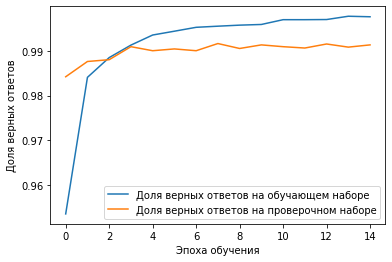

313/313 [==============================] - 1s 2ms/step - loss: 0.0343 - accuracy: 0.9913
[0.03429916128516197, 0.9912999868392944]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

При "стандартном" наборе - точность высокая 99.13%.


#### Изменение кол-ва слоев в большую сторону

Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1515 - accuracy: 0.9535 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0318 - val_accuracy: 0.9888
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0278 - val_accuracy: 0.9913
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0267 - val_accuracy: 0.9918
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0213 - val_accuracy: 0.9926

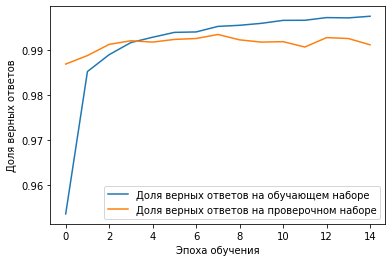

313/313 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9912
[0.03940208628773689, 0.9911999702453613]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Добавление еще 2 слоя Conv2D c тем же набором параметров
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

Точность не изменилась - 99,12%

##### Один сверточный слой

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1959 - accuracy: 0.9384 - val_loss: 0.0678 - val_accuracy: 0.9757
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.9774 - val_loss: 0.0484 - val_accuracy: 0.9840
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0393 - val_accuracy: 0.9863
Epoch 

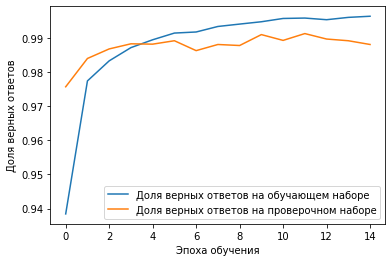

313/313 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9881
[0.0391247496008873, 0.988099992275238]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))

# Оставляем 1 слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

Точность модели с 1 слоем Conv2D снизилась до 98,81%

#### Изменение кол-во фильтров, слоев, maxpooling, dropout

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1986 - accuracy: 0.9383 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0242 - val_accuracy: 0.9918
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0207 - val_accuracy: 0.9935
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0174 - val_accuracy: 0.9940
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0192 - val_accuracy: 0.9945
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0236 - val_accuracy: 0.9916
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0186 - val_accuracy: 0.9948

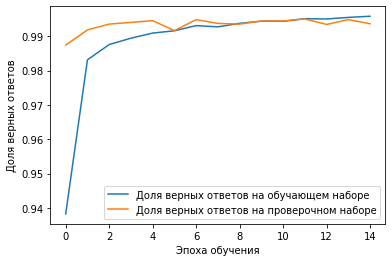

313/313 [==============================] - 1s 2ms/step - loss: 0.0233 - accuracy: 0.9936
[0.023314692080020905, 0.9936000108718872]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
# Первый сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой Dropout
model.add(Dropout(0.25))

# Добавление еще 2 слоя Conv2D c другим набором параметров
#Слой пакетной нормализации
model.add(BatchNormalization())
# 3-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 4-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 2-й maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2-й dropout
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

Здесь высокая. Повысилась до 99,36%

##### Тот же набор, что и выше с добавлением еще Dense слоев

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2437 - accuracy: 0.9237 - val_loss: 0.0383 - val_accuracy: 0.9880
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0671 - accuracy: 0.9807 - val_loss: 0.0291 - val_accuracy: 0.9904
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0515 - accuracy: 0.9851 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0235 - val_accuracy: 0.9928
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0262 - val_accuracy: 0.9923
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0236 - val_accuracy: 0.9922
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0319 - val_accuracy: 0.9915

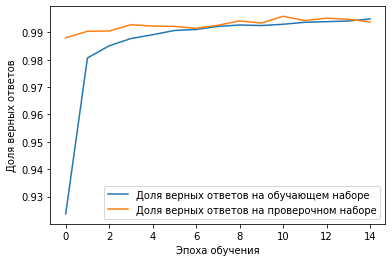

313/313 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9938
[0.020973453298211098, 0.9937999844551086]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
# Первый сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой Dropout
model.add(Dropout(0.25))

# Добавление еще 2 слоя Conv2D c другим набором параметров
#Слой пакетной нормализации
model.add(BatchNormalization())
# 3-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 4-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 2-й maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2-й dropout
model.add(Dropout(0.25))

model.add(Flatten())
# Первый слой Dense
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# Второй слой Dense 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

Точность по сравнению с предыдущим набором не изменилась - 99,38%

##### Набор из предыдущего без dropout

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 0.1199 - accuracy: 0.9631 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0350 - val_accuracy: 0.9878
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0322 - val_accuracy: 0.9898
Epoch 4/15
469/469 [==============================] - 4s 10ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0274 - val_accuracy: 0.9909
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 6/15
469/469 [==============================] - 4s 10ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0387 - val_accuracy: 0.9907
Epoch 7/15
469/469 [==============================] - 4s 10ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0341 - val_accuracy: 0.9910

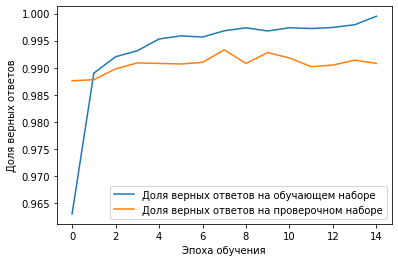

313/313 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9908
[0.05174992233514786, 0.9908000230789185]


In [ ]:
# загрузка данных
x_train, y_train, x_test, y_test = prepare_data()

batch_size = 128

# Cоздание НС
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
# Первый сверточный слой
model.add(Conv2D(32, 3, padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой Dropout
#model.add(Dropout(0.25))

# Добавление еще 2 слоя Conv2D c другим набором параметров
#Слой пакетной нормализации
model.add(BatchNormalization())
# 3-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 4-й сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 2-й maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2-й dropout
#model.add(Dropout(0.25))

model.add(Flatten())
# Первый слой Dense
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))

# Второй слой Dense 
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

# компиляция сети
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# График точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# print(history.history['val_accuracy'][-1])

print(model.evaluate(x_test, y_test))

Точность без droput снизилась, по сравнению с другими 2-мя предыдущими наборами до 99.08%

В принципе, точность с различными наборами параметрами (уменьшение, увеличение сверточных слоев, фильтров, нейронов, maxpooling, с dropout и без него и т.д.) не сильно меняется. В основном меняется время обучения.

## 2 Вариант

Добейтесь точности 90% на проверочной выборке на базе Cifar10. Размер проверочной выборки - 20%.

In [ ]:
def prepare_data_cifar10():
  (x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
  # OHE
  y_train10 = utils.to_categorical(y_train10, 10)
  y_test10 = utils.to_categorical(y_test10, 10)

  # Размеры выборок перед обучением
  print(x_train10.shape)
  print(x_test10.shape)
  print(y_train10.shape)
  print(y_test10.shape)

  return x_train10, y_train10, x_test10, y_test10

In [ ]:
def create_model_cifar10_1_var(): 
  #Создаем последовательную модель
  model = Sequential()
  #Слой пакетной нормализации
  model.add(BatchNormalization(input_shape=(32, 32, 3)))
  #Первый сверточный слой
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  #Второй сверточный слой
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  #Первый слой подвыборки
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Слой регуляризации Dropout
  model.add(Dropout(0.25))

  #Слой пакетной нормализации
  model.add(BatchNormalization())
  #Третий сверточный слой
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  #Четвертый сверточный слой
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  #Второй слой подвыборки
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Слой регуляризации Dropout
  model.add(Dropout(0.25))

  #Слой пакетной нормализации
  model.add(BatchNormalization())
  #Пятый сверточный слой
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  #Шестой сверточный слой
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  #Третий слой подвыборки
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Слой регуляризации Dropout
  model.add(Dropout(0.25))

  #Слой преобразования данных из 2D представления в плоское
  model.add(Flatten())
  #Полносвязный слой для классификации
  model.add(Dense(512, activation='relu'))
  #Слой регуляризации Dropout
  model.add(Dropout(0.25))
  #Выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
  
  return model

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/200
3/3 [==============================] - 1s 208ms/step - loss: 2.6226 - accuracy: 0.0990 - val_loss: 2.2950 - val_accuracy: 0.1302
Epoch 2/200
3/3 [==============================] - 0s 136ms/step - loss: 2.4917 - accuracy: 0.0807 - val_loss: 2.2993 - val_accuracy: 0.1094
Epoch 3/200
3/3 [==============================] - 0s 139ms/step - loss: 2.4355 - accuracy: 0.1302 - val_loss: 2.3074 - val_accuracy: 0.0755
Epoch 4/200
3/3 [==============================] - 0s 140ms/step - loss: 2.4015 - accuracy: 0.1120 - val_loss: 2.3080 - val_accuracy: 0.0677
Epoch 5/200
3/3 [==============================] - 0s 140ms/step - loss: 2.3270 - accuracy: 0.1406 - val_loss: 2.2971 - val_accuracy: 0.0859
Epoch 6/200
3/3 [==============================] - 0s 139ms/step - loss: 2.3844 - accuracy: 0.1354 - val_loss: 2.2989 - val_accuracy: 0.1094
Epoch 7/200
3/3 [==============================] - 0s 138ms/step - loss: 2.2774 - accuracy: 

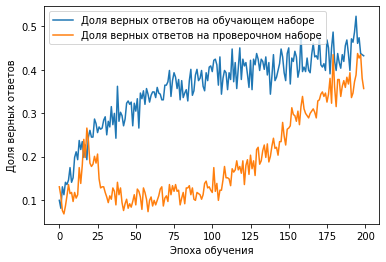

313/313 [==============================] - 1s 4ms/step - loss: 1.5998 - accuracy: 0.4316
[1.599833607673645, 0.43160000443458557]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_26 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 16, 16, 32)        1

In [ ]:
# Вариант с генератором
batch_size = 128
epochs = 200
validation_split = 0.2

x_train10, y_train10, x_test10, y_test10 = prepare_data_cifar10()
model = create_model_cifar10_1_var()

datagen = ImageDataGenerator(rotation_range=10, # 40
                             width_shift_range=0.1, #0.2
                             height_shift_range=0.1, #0.2
                             zoom_range=0.1, #0.2
                             horizontal_flip=True,
                             fill_mode='nearest')
                             # validation_split=0.2)

#инициализация генератора
datagen.fit(x_train10)

# обучающая выборка
train_generator = datagen.flow(x_train10, y_train10,
                               batch_size=batch_size)
                               #shuffle=True)

# проверочная выборка
validation_generator = datagen.flow(x_train10, y_train10,
                               batch_size=batch_size)
                               #shuffle=True)

# Обучение
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(train_generator) // batch_size,
                              validation_data = validation_generator, 
                              validation_steps = len(validation_generator) // batch_size,
                              epochs=epochs, verbose=1)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

print(model.evaluate(x_test10, y_test10))
print(model.summary())

print(model.evaluate(x_test10, y_test10))
#print(model.summary())

In [ ]:
# Другой вариант №2
# Создание НС
def create_model_cifar10_2_var():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) # 0.25

  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) # 0.25

  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) # 0.25

  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) # 0.25

  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) # 0.25


  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25)) # 0.25
 
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25)) # 0.25

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.25)) # 0.25

  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25)) # 0.25


  model.add(Dense(10, activation='softmax'))

  # Компиляция
  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

  return model

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/100
391/391 [==============================] - 10s 25ms/step - loss: 2.0796 - accuracy: 0.1956 - val_loss: 2.7600 - val_accuracy: 0.1001
Epoch 2/100
391/391 [==============================] - 11s 27ms/step - loss: 1.7375 - accuracy: 0.3384 - val_loss: 1.8782 - val_accuracy: 0.3451
Epoch 3/100
391/391 [==============================] - 10s 25ms/step - loss: 1.5502 - accuracy: 0.4359 - val_loss: 1.6274 - val_accuracy: 0.4470
Epoch 4/100
391/391 [==============================] - 9s 24ms/step - loss: 1.4211 - accuracy: 0.4955 - val_loss: 1.3424 - val_accuracy: 0.5254
Epoch 5/100
391/391 [==============================] - 9s 24ms/step - loss: 1.3228 - accuracy: 0.5336 - val_loss: 1.2394 - val_accuracy: 0.5726
Epoch 6/100
391/391 [==============================] - 9s 24ms/step - loss: 1.2291 - accuracy: 0.5754 - val_loss: 1.1426 - val_accuracy: 0.6061
Epoch 7/100
391/391 [==============================] - 9s 23ms/step - l

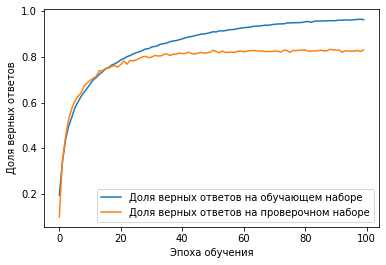

313/313 [==============================] - 1s 4ms/step - loss: 0.7891 - accuracy: 0.8298
[0.7891020774841309, 0.829800009727478]
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_29 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 16, 16, 32)        12

In [ ]:
x_train10, y_train10, x_test10, y_test10 = prepare_data_cifar10()
model = create_model_cifar10_2_var()

batch_size =128 #128, 256
epochs=100
# Обучение
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=epochs, validation_data=(x_test10, y_test10),
                    verbose=1)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

print(model.evaluate(x_test10, y_test10))
print(model.summary())

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/100
3/3 [==============================] - 1s 233ms/step - loss: 2.3091 - accuracy: 0.1016 - val_loss: 2.3020 - val_accuracy: 0.0990
Epoch 2/100
3/3 [==============================] - 0s 140ms/step - loss: 2.3005 - accuracy: 0.1250 - val_loss: 2.3024 - val_accuracy: 0.0911
Epoch 3/100
3/3 [==============================] - 0s 145ms/step - loss: 2.3333 - accuracy: 0.0911 - val_loss: 2.3021 - val_accuracy: 0.1224
Epoch 4/100
3/3 [==============================] - 0s 138ms/step - loss: 2.2966 - accuracy: 0.1198 - val_loss: 2.3023 - val_accuracy: 0.0990
Epoch 5/100
3/3 [==============================] - 0s 142ms/step - loss: 2.3191 - accuracy: 0.0938 - val_loss: 2.3024 - val_accuracy: 0.1354
Epoch 6/100
3/3 [==============================] - 0s 137ms/step - loss: 2.3141 - accuracy: 0.1120 - val_loss: 2.3024 - val_accuracy: 0.0911
Epoch 7/100
3/3 [==============================] - 0s 135ms/step - loss: 2.3131 - accuracy: 

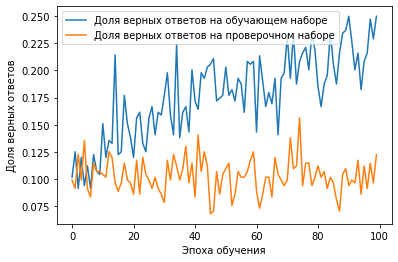

313/313 [==============================] - 1s 5ms/step - loss: 2.5384 - accuracy: 0.1060
[2.538405179977417, 0.10599999874830246]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_34 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 16, 16, 32)        1

In [ ]:
# 2-й Вариант с генератором
batch_size = 128
epochs = 100
validation_split = 0.2

x_train10, y_train10, x_test10, y_test10 = prepare_data_cifar10()
model = create_model_cifar10_2_var()

datagen = ImageDataGenerator(rotation_range=10, # 40
                             width_shift_range=0.1, #0.2
                             height_shift_range=0.1, #0.2
                             zoom_range=0.1, #0.2
                             horizontal_flip=True,
                             fill_mode='nearest')
                             # validation_split=0.2)

#инициализация генератора
datagen.fit(x_train10)

# обучающая выборка
train_generator = datagen.flow(x_train10, y_train10,
                               batch_size=batch_size)
                               #shuffle=True)

# проверочная выборка
validation_generator = datagen.flow(x_train10, y_train10,
                               batch_size=batch_size)
                               #shuffle=True)

# Обучение
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(train_generator) // batch_size,
                              validation_data = validation_generator, 
                              validation_steps = len(validation_generator) // batch_size,
                              epochs=epochs, verbose=1)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

print(model.evaluate(x_test10, y_test10))
print(model.summary())

print(model.evaluate(x_test10, y_test10))
#print(model.summary())

In [ ]:
# 3 вариант
def create_model_cifar10_3_var(): 
  #Создаем последовательную модель
  model = Sequential()

  model.add(BatchNormalization(input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  # model.add(BatchNormalization())
  # model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  # model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))


  model.add(Flatten())
  model.add(Dense(3072, activation='relu'))
  model.add(Dropout(0.25))

  # model.add(Flatten())
  # model.add(Dense(1024, activation='relu'))
  # model.add(Dropout(0.25))

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(10, activation='softmax'))

  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
  
  return model

In [ ]:
x_train10, y_train10, x_test10, y_test10 = prepare_data_cifar10()
model = create_model_cifar10_3_var()

batch_size =128 #128, 256
epochs=160
# Обучение
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=epochs, validation_data=(x_test10, y_test10),
                    verbose=1)

# График точности
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

print(model.evaluate(x_test10, y_test10))
print(model.summary())

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/160
391/391 [==============================] - 75s 191ms/step - loss: 1.6483 - accuracy: 0.3845 - val_loss: 2.6094 - val_accuracy: 0.2013
Epoch 2/160
391/391 [==============================] - 74s 189ms/step - loss: 1.2090 - accuracy: 0.5598 - val_loss: 1.2677 - val_accuracy: 0.5460
Epoch 3/160
391/391 [==============================] - 74s 189ms/step - loss: 1.0043 - accuracy: 0.6395 - val_loss: 1.1263 - val_accuracy: 0.6118
Epoch 4/160
391/391 [==============================] - 74s 188ms/step - loss: 0.8646 - accuracy: 0.6934 - val_loss: 0.8037 - val_accuracy: 0.7136
Epoch 5/160
391/391 [==============================] - 74s 188ms/step - loss: 0.7580 - accuracy: 0.7318 - val_loss: 0.8218 - val_accuracy: 0.7259
Epoch 6/160
391/391 [==============================] - 74s 189ms/step - loss: 0.6746 - accuracy: 0.7626 - val_loss: 0.7429 - val_accuracy: 0.7483
Epoch 7/160
391/391 [==============================] - 74s 188